# Preliminary / Background Material

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Assignment 0 (due date: see the course [webpage](http://machlearn.gitlab.io/isml2018/) )

Name: XINWEI JIANG

Student ID: u6591933

## Instructions

|             |Notes|
|:------------|:--|
|Maximum marks| 20|
|Weight|2% of final grade|
|Format| Complete this ipython notebook. Do not forget to fill in your name and student ID above|
|Submission mode| Use [wattle](https://wattle.anu.edu.au/)|
|Formulas| All formulas which you derive need to be explained unless you use very common mathematical facts. Picture yourself as explaining your arguments to somebody who is just learning about your assignment. With other words, do not assume that the person marking your assignment knows all the background and therefore you can just write down the formulas without any explanation. It is your task to convince the reader that you know what you are doing when you derive an argument. Typeset all formulas in $\LaTeX$.|
| Code quality | Python code should be well structured, use meaningful identifiers for variables and subroutines, and provide sufficient comments. Please refer to the examples given in the tutorials. |
| Code efficiency | An efficient implementation of an algorithm uses fast subroutines provided by the language or additional libraries. For the purpose of implementing Machine Learning algorithms in this course, that means using the appropriate data structures provided by Python and in numpy/scipy (e.g. Linear Algebra and random generators). |
| Late penalty | We will not accept late assignments. You will get zero marks if you miss the deadline. Submit early, submit often. | 
| Coorperation | All assignments must be done individually. Cheating and plagiarism will be dealt with in accordance with University procedures (please see the ANU policies on [Academic Honesty and Plagiarism](http://academichonesty.anu.edu.au)). Hence, for example, code for programming assignments must not be developed in groups, nor should code be shared. You are encouraged to broadly discuss ideas, approaches and techniques with a few other students, but not at a level of detail where specific solutions or implementation issues are described by anyone. If you choose to consult with other students, you will include the names of your discussion partners for each solution. If you have any questions on this, please ask the lecturer before you act. |


$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$

Setting up the environment

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

%matplotlib inline

# Part 1: Probability
## (5 points) 1A: Basic Rules
1. State the sum rule of probability.
- State the product rule of probability.
- State Bayes' rule.
- Prove Bayes' rule, justifying each step.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>
1. sum rule: $p(X)= \sum_{Y}p(X,Y)$, for the probability of $X=x_i$ equals to the sum of $\sum_{j=1}^np(X=x_i, Y=y_j)$.
2. product rule: $p(X,Y) = p(X|Y)p(Y)$
3. Bayes' rule: $p(Y|X)=  {(p(X|Y)p(Y))\over(p(X))}$
4. From product rule, we can get $p(X,Y) = p(X|Y)p(Y) = p(Y|X)p(X)$, then $p(X|Y)p(Y) = p(Y|X)p(X)$, therefore, $p(Y|X)= {(p(X|Y)p(Y))\over(p(X))}$

## (2 points) 1B: Bayes' Rule (continuous random variables)
A croupier samples a standard normal $X\sim \mathcal{N}(\mu=0,\sigma^2=1)$, and tosses a fair coin. If the coin lands on heads, she reveals to you the number $Z=X+1$. If it comes up tails she reveals $Z=X-1$. 

1. What is the probability that the number she reveals, $Z$, is greater than $a$, given that she tossed heads? 
- What is the probability she tossed heads, if the number she reveals to you is greater than $a$? 

Express the results in terms of the cumulative distribution function of the standard normal, that is $\Phi(a):=P(X<a)$.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i><br>
1. The croupier tossed head, so $Z=X+1$. $Z>a\Rightarrow X+1>a\Rightarrow X>a-1$, $\Phi(a-1):=P(X<a-1)$, $P(X>a-1)=1-\Phi(a-1)$. Therefore, the probability that the number she reveals, $Z$, is greater than $a$, given that she tossed heads is $1-\Phi(a-1)$.
2. Event "heads": tossed head, Event "Z>a": Z is greater than a. $p(heads|Z>a)={p(Z>a|heads)p(heads)\over(p(Z>a))}$. From 1, $p(Z>a|heads)=1-\Phi(a-1)$, $p(heads)={1\over2}$, $p(Z>a)=(1/2)\times(1-\Phi(a-1))+(1/2)\times(1-\Phi(a+1))$. Therefore, $$p(heads|Z>a)={p(Z>a|heads)p(heads)\over(p(Z>a))} = {{1\over2}(1-\Phi(a-1))\over{1\over2}\times(1-\Phi(a-1))+{1\over2}\times(1-\Phi(a+1))} = {(1-\Phi(a-1))\over(1-\Phi(a-1))+(1-\Phi(a+1))}$$

## (5 points) 1D: Bayes Rule Simulation and Plot
1. Write a function ```theoretical_p``` which takes argument $a$ and returns the theoretical conditional probability derived in quesiton 1.B.2, using ```scipy.stats.norm.cdf``` to compute $\Phi$
- Write a function ```monte_carlo_p``` which takes arguments $a$ and $n$, and which performs the croupier's sampling procedure $n$ times and returns an empirical estimate of the probability we computed above using our theoretical result of 1.B.2. Use the functions ```np.random.randn```, ```np.random.binomial``` and ```np.mean```. Avoid explicit loops, instead rely on the boolean index array feature of numpy.
- Plot the theoretical solution as a function of $a\in [-5,5]$ using the functions ```np.linspace``` to make a grid of $1024$ values for $a$.
- Overlay a plot of the empirical estimate with $n=500$. Label the two plots using the ```label``` argument to ```plt.plot``` along with ```plt.legend(loc='best')``` after plotting. Always label the axes in your plots. Add grid lines with ```plt.grid()```. Matplotlib accepts latex strings such as ```xlabel=r'$a$'```.
- Provide an intuitive explanation for the limiting values of the plot as $a\rightarrow-\infty$ and $a\rightarrow+\infty$.

'\nQuestion 5. From the graph, we can see that the limited value of the plot when a to negative infinite is 0.5, \n            and the limited value of the plot when a to positive infinite is 1\n'

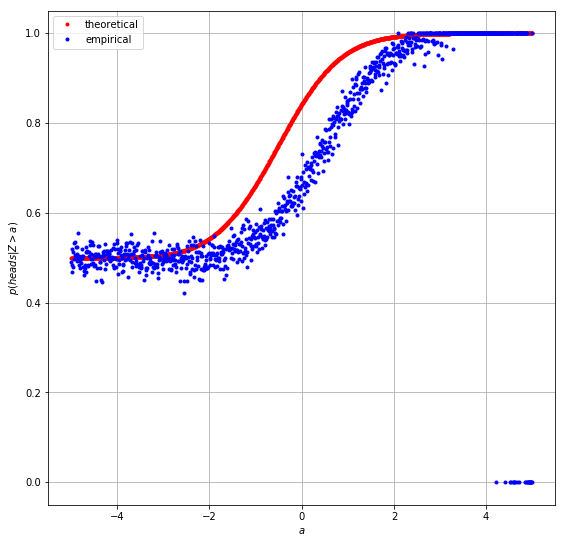

In [132]:
# replace this with your solution
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#question 1
def theoretical_p(a):
    p_X = 1/2     # the probability of she tossed heads
    p_Y = (1/2)*(1-norm.cdf(a-1,0,1)) + (1/2)*(1-norm.cdf(a+1,0,1))  # the probability of Z greater than a
    p_Y_on_X = 1-norm.cdf(a-1,0,1)  #the probability of Z greater than a given that she tossed heads
    p_X_on_Y = (p_Y_on_X * p_X)/p_Y   #the  probability of she tossed heads given that Z greater than a
    return p_X_on_Y

#question 2
def monte_carlo_p(a,n):
    p_X = 1/2     # the probability of she tossed heads
    X = np.random.randn(n) + 1
    heads=np.random.binomial(1, 0.5, n)
    i=(heads!=0)     #the index of heads
    X[i] = X[i] + 1  #Z = X + 1
    i=(heads==0)     #the index of tails
    X[i] = X[i] - 1  #Z = X - 1
    k = sum(X>a)     #find the total number of Z>a
    i=(heads!=0)     #the index of heads
    v = sum(X[i]>a)  #find the total number of the coin is head and Z>a
    if k==0:
        p = 0
    else:
        p = v/k
    return p

#question 3&4
A = np.linspace(-5,5,1024)    #get the value of a
fig = plt.figure(figsize=(20,20))    
ax = fig.add_subplot(221)
p1 = []
p2 = []
for a in A:
    p1.append(theoretical_p(a))
    p2.append(monte_carlo_p(a,500))
ax.plot(A,p1,'r.',label='theoretical')
ax.plot(A,p2,'b.',label='empirical')
plt.legend(loc='best')
ax.set_xlabel(r'$a$')
ax.set_ylabel('$p(heads|Z>a)$')
plt.grid()
'''
Question 5. From the graph, we can see that the limited value of the plot when a to negative infinite is 0.5, 
            and the limited value of the plot when a to positive infinite is 1
'''

# Part 2: Linear Algebra and Calculus

## (2 Points) 2A: Linear Regression (theory)
Assume the deterministic model $y_i=\sum_{j=1}^d w_j x_{i,j}, i=1, 2, \ldots n$.
1. Write the model in matrix form using capital letters for matrices and bold lowercase for vectors, stating the dimensionality of the variables.
- Assume we observe corrupted targets $\hat{y}_i=y_i+\epsilon_i$, where $\epsilon_i$ represents unpredictable noise. Write the sum of squared errors $\sum_{i=1}^n (\sum_{j=1}^d w_j x_{i,j}-\hat{y}_i)^2$ in matrix form, and derive the vector $\mathbf{w}^\star$ which minimises it. You may wish to google <i>e.g.</i> "Sam Roweis matrix identities" and look at the section on "derivatives of scalar forms".

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>
1. ${\mathbf y} = {\mathbf w}^TX$.
   
   Where
   ${\mathbf w}=$$
    \begin{pmatrix}
    w_1 & w_2 & w_3 &\cdots &w_d \\
    \end{pmatrix}^T$$ 
    $,
   $X =$$
    \begin{pmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} &\cdots &x_{1,d} \\
    x_{2,1} & x_{2,2} & x_{2,3} &\cdots &x_{2,d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n,1} & x_{n,2} & x_{n,3} &\cdots &x_{n,d} \\
    \end{pmatrix}^T$$
    $.
    
    The dimensionality of the ${\mathbf w}$ is d, the dimensionality of the $X$ is $d\times n$, the dimensionality of the ${\mathbf y}$ is n.
    
2. $\sum_{i=1}^n (\sum_{j=1}^d w_j x_{i,j}-\hat{y}_i)^2 = \sum_{i=1}^n({\mathbf w}^TX_i-\hat{y}_i)^2 = (X{\mathbf w}-{\mathbf y})^T(X{\mathbf w}-{\mathbf y})$.

    where
${\mathbf w}=$$
    \begin{pmatrix}
    w_1 & w_2 & w_3 &\cdots &w_d \\
    \end{pmatrix}^T
    $$ $,
   $X = $$
    \begin{pmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} &\cdots &x_{1,d} \\
    x_{2,1} & x_{2,2} & x_{2,3} &\cdots &x_{2,d} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n,1} & x_{n,2} & x_{n,3} &\cdots &x_{n,d} \\
    \end{pmatrix}
    $$ $,
    ${\mathbf y}=$$
    \begin{pmatrix}
    \hat{y}_1 & \hat{y}_2 & \hat{y}_3 &\cdots &\hat{y}_n \\
    \end{pmatrix}^T
    $$ $.
    
    ${d((X{\mathbf w}-{\mathbf y})^T(X{\mathbf w}-{\mathbf y})\over dw} = (1+1^T)(X{\mathbf w}-{\mathbf y}){\mathbf w}^T = 2(X{\mathbf w}-{\mathbf y})X^T$ should be equal to 0 to minimise the sum of squared errors. 
    
    $2(X{\mathbf w}-{\mathbf y})X^T = 0, (X{\mathbf w}-{\mathbf y})X^T = 0, XX^T {\mathbf w} = {\mathbf y}X^T, {\mathbf w} = (X^TX)^{-1}X^T{\mathbf y}$. Therefore ${\mathbf w^*} = (X^TX)^{-1}X^T{\mathbf y}$.

## (3 Points) 2B: Univariate Regression (theory)

$\newcommand{\RR}{\mathbb{R}}$

The inner product between two functions $u:\RR\to\RR$ and
$v:\RR\to\RR$ is defined as the definite integral
$$
u^\top v = \langle u,v \rangle := \int_a^b u(x) v(x) dx.
$$

Given a function
$$f(x) = \sqrt{x}$$
for $x\in[0,1],$
and we want to fit it by a straight line
$$y = mx + c.$$

Find the best line, that is find the parameters $m$ and $c$, 
using each of the following three methods:
1. Minimize the squared error $E^2 = \int_0^1 \left(\sqrt{x} - c - mx\right)^2dx$
2. Solve using the matrix least squares formula you derived in the previous section
    $$
    \begin{bmatrix}
      1&x
    \end{bmatrix}
    \begin{bmatrix}
      c\\m
    \end{bmatrix}
    =
    \begin{bmatrix}
      \sqrt{x}
    \end{bmatrix}
    $$
3. Note that $x$ is not orthogonal to $1$, but show that
    $x-\frac{1}{2}$ is orthogonal to $1$. Find the projection of
    $\sqrt{x}$ onto this orthogonal basis.
 

*For this course, we will rarely use inner products between functions. This question is about testing your understanding of linear algebra and calculus.*

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>
1. $E^2 = \int_0^1 \left(\sqrt{x} - c - mx\right)^2dx$, $E^2 = [{x^2 \over 2}-{4cx^{3\over2}\over3}-{4mx^{5\over2}\over5}+cmx^2+c^2x+{m^2x^3\over3}]_{0}^1 = {1\over 2} - {4c\over3} - {4m\over5} + cm + c^2 + {m^2\over3}$, ${dE^2\over dc} = {-4\over3} + m + 2c$, ${dE^2\over dm} = {-4\over5} + c + {2m\over3}$. In order to minimize the $E^2$, ${dE^2\over dc}$ and ${dE^2\over dm}$ should be equal to 0.
$$\begin{cases}
{-4\over3} + m + 2c = 0 \\
{-4\over5} + c + {2m\over3} = 0
\end{cases}
$$

    then, 
$$
\begin{cases}
m = {4\over5} \\
c = {4\over15}
\end{cases}
$$
2. Matrix least squares formula is ${\mathbf w} = (X^TX)^{-1}X^T{\mathbf y}$. 
   $$ 
   X = \begin{pmatrix}
        1&x \\
    \end{pmatrix},
   {\mathbf w} = \begin{pmatrix}
        c \\ m
    \end{pmatrix},
   {\mathbf y} = \begin{pmatrix}
        \sqrt x \\
    \end{pmatrix} 
   $$
  
   $$X^TX = \begin{pmatrix}1\\x \end{pmatrix}\begin{pmatrix}1&x \end{pmatrix}=
           \begin{pmatrix}\int_0^1 1dx & \int_0^1 xdx\\\int_0^1 xdx & \int_0^1 x^2dx \end{pmatrix}
         = \begin{pmatrix}[x]_0^1& [{x^2\over 2}]_0^1\\ [{x^2\over 2}]_0^1 & [{x^3\over 3}]_0^1 \end{pmatrix}
         = \begin{pmatrix}1 & {1\over 2}\\ {1\over 2} & {1\over 3} \end{pmatrix}$$
         
   $$(X^TX)^{-1} = {1\over{{1\over3}-{1\over4}}}\begin{pmatrix}{1\over3} & -{1\over 2}\\ -{1\over 2} & 1 \end{pmatrix} = \begin{pmatrix}4 & -6\\ -6 & 12 \end{pmatrix}$$
   
   $$X^T{\mathbf y} = \begin{pmatrix}1\\x \end{pmatrix}\begin{pmatrix}\sqrt x \end{pmatrix}=
           \begin{pmatrix}\int_0^1 {\sqrt x}dx \\\int_0^1 x{\sqrt x}dx \end{pmatrix}
         = \begin{pmatrix}[{2x^{3\over2}\over3}]_0^1\\ [{2x^{5\over2}\over5}]_0^1 \end{pmatrix}
         = \begin{pmatrix}{2\over 3}\\ {2\over 5}\end{pmatrix}$$
         
   $${\mathbf w} = (X^TX)^{-1}X^T{\mathbf y}=\begin{pmatrix}4 & -6\\ -6 & 12 \end{pmatrix}\begin{pmatrix}{2\over 3}\\ {2\over 5}\end{pmatrix} = \begin{pmatrix}{4\over 15}\\ {4\over 5}\end{pmatrix}$$
   
   Therefore, we can get $c={4\over15}, m={4\over 5}$.
3. The orthogonal basis is $\{x-{1\over 2}, 1\}$. The projection of ${\sqrt x}$ on this orthogonal basis is
$$\begin{align}
&{{\langle{x-{1\over2}, \sqrt x}\rangle} \over {\langle x-{1\over2}, x-{1\over2}\rangle}}(x-{1\over2}) + {{\langle 1, \sqrt x \rangle} \over {\langle 1, 1 \rangle}}(1)\\
&={\int_0^1 ({\sqrt x}(x-{1\over2})dx \over \int_0^1((x-{1\over2}^2)dx}(x-{1\over2})+{\int_0^1 {\sqrt x}dx \over \int_0^1 1dx} \\
&= {[{2x^{5\over2}\over5}-{x^{2\over3}\over3}]_0^1\over[{x^3\over3}+{1x\over4}-{x^2\over2}]_0^1}(x-{1\over2}) + {[{2x^{3\over2}\over3}]_0^1\over1}\\
&={{2\over5}-{1\over3}\over {1\over3}+{1\over4}-{1\over2}}(x-{1\over2})+{2\over3}\\
&={4x\over5}+{4\over15}
\end{align}$$
 Therefore, we can get $c={4\over15}, m={4\over 5}$.

## (3 Points) 2C: Linear Regression (python)
1. Let $d=3, n=100$ and generate $x_{i,j}, w_j$ and $\epsilon_i$ i.i.d. from $\mathcal{N}(0,1)$ using ```np.random.randn```.
- Imagine that the $w_j$ are unknown parameters, and compute them as a function of the $x_{i,j}$ and $\hat{y}_i$ using your least squares formula from the previous question. Hint: use the at symbol @ for matrix multiplication and ```np.linalg.solve``` for solving linear systems. In general explicit matrix inverse computations are to be avoided for reasons of numerical stability.
- Compare your estimated $\mathbf{w}^\star$ with the ground truth by printing them side by side.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

In [133]:
import numpy as np

#Question 1
w = 1 * np.random.randn(1,3)
x = 1 * np.random.randn(100, 3)
epsilon = 1 * np.random.randn(100,1)

#Question 2
y = x@w.transpose() + epsilon    #target function
right = x.transpose()@y          #right = x^T * y
left = x.transpose()@x           #left = x^T * x
w_star = np.linalg.solve(left, right)

#Question 3
print("w*:", w_star.transpose())
print("w:", w)

w*: [[ 0.66420183  0.12457237 -0.89363284]]
w: [[ 0.7651838   0.00647921 -0.8246595 ]]
